<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Pabloacostatec-A01794035-/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n_A01794035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumno: Juan Pablo Acosta López

Matrícula: A01794035




#1.- Descargar datos y ponerlos en Data Frame

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
import os
from sklearn.decomposition import PCA

#Define DB link
input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

#Transform into DF
df = pd.read_csv(input)
df.set_index('ID', inplace= True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


#2.- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [ ]:
print('printing headers and a little data-----------------------------------------------')
print(df.head)
print('printing th type of each feature of the data-------------------------------------')
print(df.dtypes)
print('printing info of the df----------------------------------------------------------')
print(df.info)
print('printing the count of nulls for each feature-------------------------------------')
print(df.isna().sum())

printing headers and a little data-----------------------------------------------
<bound method NDFrame.head of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -

#3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [ ]:
from sklearn.impute import SimpleImputer

imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent',copy= True)
imp_freq.fit(df)

df = pd.DataFrame(imp_freq.transform(df))

print(df)

print('printing the count of nulls for each feature, all features should have 0 nulls after inputting-------------------------------------')
print(df.isna().sum())

             0    1    2    3     4    5    6    7    8    9   ...       14  \
0       20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
1      120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
2       90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
3       50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
4       50000.0  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...         ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29995  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29997   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29998   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
29999   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

            15       16       17       18       19 

#4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603767,1.853067,1.551933,35.483133,-0.016633,-0.133667,-0.166367,-0.220733,-0.266200,...,43254.014500,40301.643433,38868.175367,5661.435767,5.920712e+03,5224.229900,4825.482533,4798.537100,5215.390600,0.221167
std,129747.661567,0.489122,0.790294,0.521963,9.217636,1.123773,1.197155,1.195911,1.168983,1.133011,...,64336.685437,60800.326465,59555.614423,16562.214424,2.304095e+04,17606.281352,15666.151619,15278.316646,17777.494206,0.415039
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2315.000000,1758.500000,1252.500000,1000.000000,8.320000e+02,390.000000,293.000000,249.000000,116.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18093.000000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5006.000000,5.000000e+03,4504.250000,4013.000000,4031.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Existen variables con varianza a niveles completamente diferentes, por ejemplo la varianza de la variable 2 es muy baja relativa a la varianza de la variable 16, además también los datos se encuentran en escalas muy diferentes también

# 5. Realiza el conteo de las variables categóricas

In [ ]:
CategoricalColumns = [1,2,3,5,6,7,8,9,10,11,22]

for i in range(0,len(CategoricalColumns)):
  print(df[CategoricalColumns[i]].value_counts())


2.0    18113
1.0    11887
Name: 1, dtype: int64
2.0    14032
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: 2, dtype: int64
2.0    15966
1.0    13657
3.0      323
0.0       54
Name: 3, dtype: int64
 0.0    14739
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2667
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: 5, dtype: int64
 0.0    15733
-1.0     6047
 2.0     3927
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: 6, dtype: int64
 0.0    15768
-1.0     5935
-2.0     4085
 2.0     3819
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: 7, dtype: int64
 0.0    16459
-1.0     5685
-2.0     4348
 2.0     3157
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: 8, dtype: int64
 0.0    16953
-1.0     5535
-2.0     4546
 2.0     2624
 3.0 

#6. Escala los datos, si consideras necesario

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
encodes = scaler.fit_transform(df)

#First we add labels to the columns of the dataframe
df.rename(columns = {0 : 'Credito_otorgado',1 : 'Genero',2 : 'Nivel_Educativo',3 : 'Estatus_civil',4 : 'Edad',5 : 'Pago_Septiembre',6 : 'Pago_Agosto',
                          7 : 'Pago_Julio',8 : 'Pago_Junio',9 : 'Pago_Mayo',10 : 'Pago_Abril',11 : 'Cantidad_por_pagar_Septiembre',12 : 'Cantidad_por_pagar_Agosto',13 : 'Cantidad_por_pagar_Julio',
                          14 : 'Cantidad_por_pagar_Junio',15 : 'Cantidad_por_pagar_Mayo',16 : 'Cantidad_por_pagar_Abril',17 : 'Cantidad_pagada_Septiembre',18 : 'Cantidad_pagada_Agosto',19 : 'Cantidad_pagada_Julio',
                          20 : 'Cantidad_pagada_Junio', 21 : 'Cantidad_pagada_Mayo',22 : 'Cantidad_pagada_Abril',23 : 'Confirmacion_de_pago_credito'}, inplace = True)

df


,Credito_otorgado,Genero,Nivel_Educativo,Estatus_civil,Edad,Pago_Septiembre,Pago_Agosto,Pago_Julio,Pago_Junio,Pago_Mayo,...,Cantidad_por_pagar_Junio,Cantidad_por_pagar_Mayo,Cantidad_por_pagar_Abril,Cantidad_pagada_Septiembre,Cantidad_pagada_Agosto,Cantidad_pagada_Julio,Cantidad_pagada_Junio,Cantidad_pagada_Mayo,Cantidad_pagada_Abril,Confirmacion_de_pago_credito
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


#7. Reduce las dimensiones con PCA, si consideras necesario.

    Indica la varianza de los datos explicada por cada componente seleccionado.
    Para actividades de exploración de los datos la varianza > 70%
    Indica la importancia de las variables en cada componente


In [ ]:
#Based on the distributions, we can identify which of the columns are used as numerical categories variables, which should not be used for the PCA exercise

df.drop(['Genero','Nivel_Educativo','Estatus_civil','Pago_Septiembre','Pago_Agosto','Pago_Julio','Pago_Junio','Pago_Mayo','Pago_Abril','Confirmacion_de_pago_credito'], inplace=True, axis=1)
df

,Credito_otorgado,Edad,Cantidad_por_pagar_Septiembre,Cantidad_por_pagar_Agosto,Cantidad_por_pagar_Julio,Cantidad_por_pagar_Junio,Cantidad_por_pagar_Mayo,Cantidad_por_pagar_Abril,Cantidad_pagada_Septiembre,Cantidad_pagada_Agosto,Cantidad_pagada_Julio,Cantidad_pagada_Junio,Cantidad_pagada_Mayo,Cantidad_pagada_Abril
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
#Start PCA
pcs = PCA()
pcs.fit(df.iloc[:, :].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df*100

pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.665263e+07,6.104687e+01,61.046867
1,1.158244e+07,2.953232e+01,90.579183
2,3.723643e+06,3.052345e+00,93.631528
3,2.773040e+06,1.692816e+00,95.324344
4,2.068662e+06,9.420563e-01,96.266400
5,2.026608e+06,9.041434e-01,97.170544
6,1.851153e+06,7.543664e-01,97.924910
7,1.703015e+06,6.384609e-01,98.563371
8,1.628317e+06,5.836809e-01,99.147052
9,1.160898e+06,2.966781e-01,99.443730


#8. Elabora los histogramas de los atributos para visualizar su distribución

0     6.104687e+01
1     2.953232e+01
2     3.052345e+00
3     1.692816e+00
4     9.420563e-01
5     9.041434e-01
6     7.543664e-01
7     6.384609e-01
8     5.836809e-01
9     2.966781e-01
10    2.385204e-01
11    1.697913e-01
12    1.479582e-01
13    1.829810e-07
Name: Proportion of variance, dtype: float64


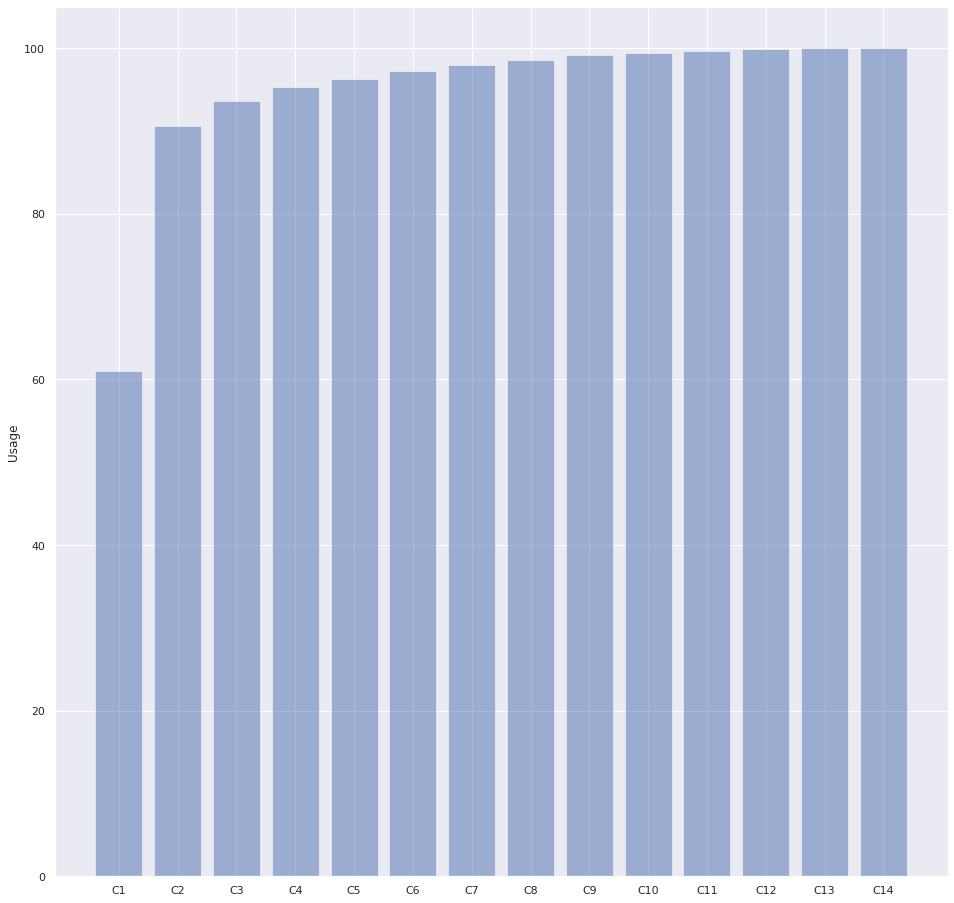

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), index = df.columns)
pcsComponents_df

y_pos = y_pos = np.arange(len(pcsSummary_df['Proportion of variance']))

print(pcsSummary_df['Proportion of variance'])

plt.bar(y_pos, pcsSummary_df['Cumulative proportion'], align='center', alpha=0.5)
plt.xticks(y_pos, ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14'])
plt.ylabel('Usage')
sns.set(rc={'figure.figsize':(16,16)})
plt.show()

#plt.bar(10, performance, align='center', alpha=0.5)


Comentario: Sólo se necesitan los primeros 2 componentes principales para explicar el 90% de la variabilidad de datos


#9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16997732d0>,
      dtype=object)

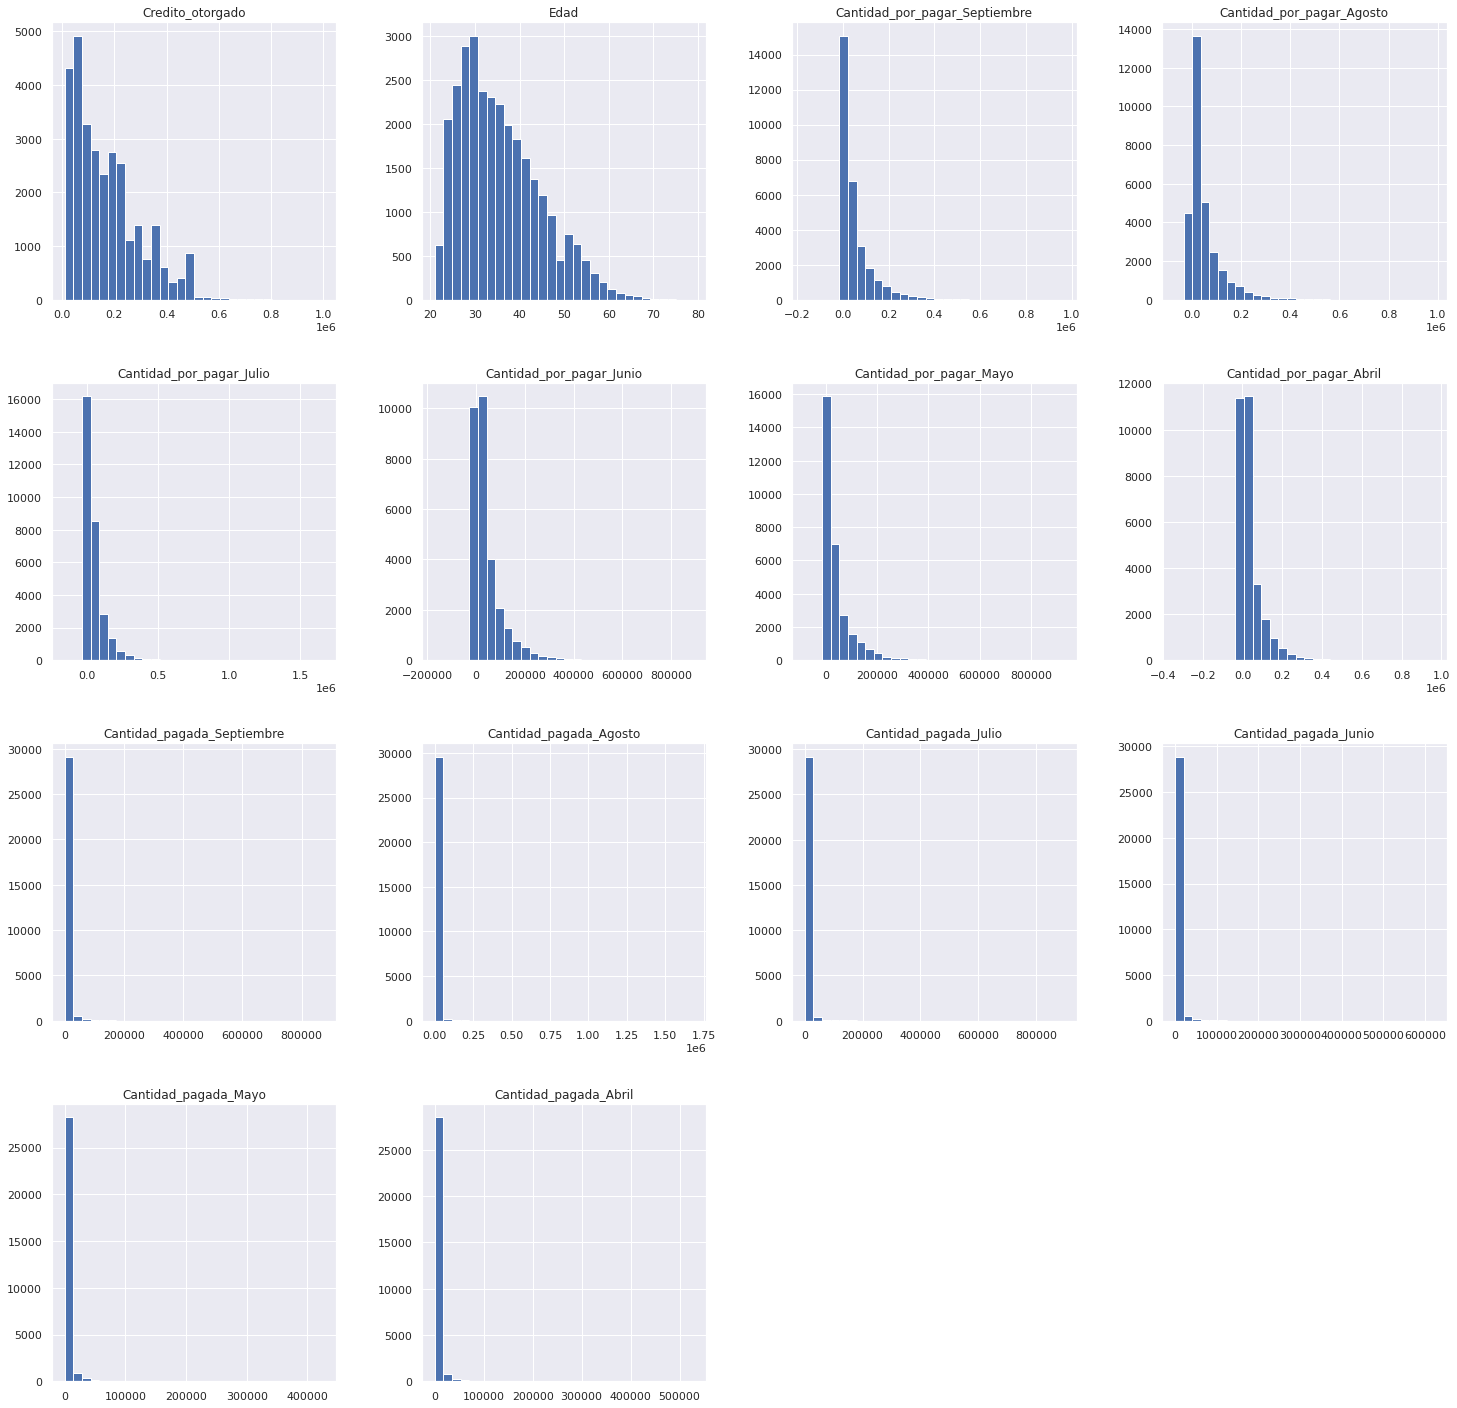

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns  
import os
from sklearn.decomposition import PCA

#Then we do histograms to identify if the numbers are continuos or discrete

Histograms = df.hist(bins=30, figsize=(25, 25))
Histograms

Estos histogramas nos ayudarán a entender que variables realmente se ven benficiadas por normalización y que variables tienen un comportamiento como de variable categórica

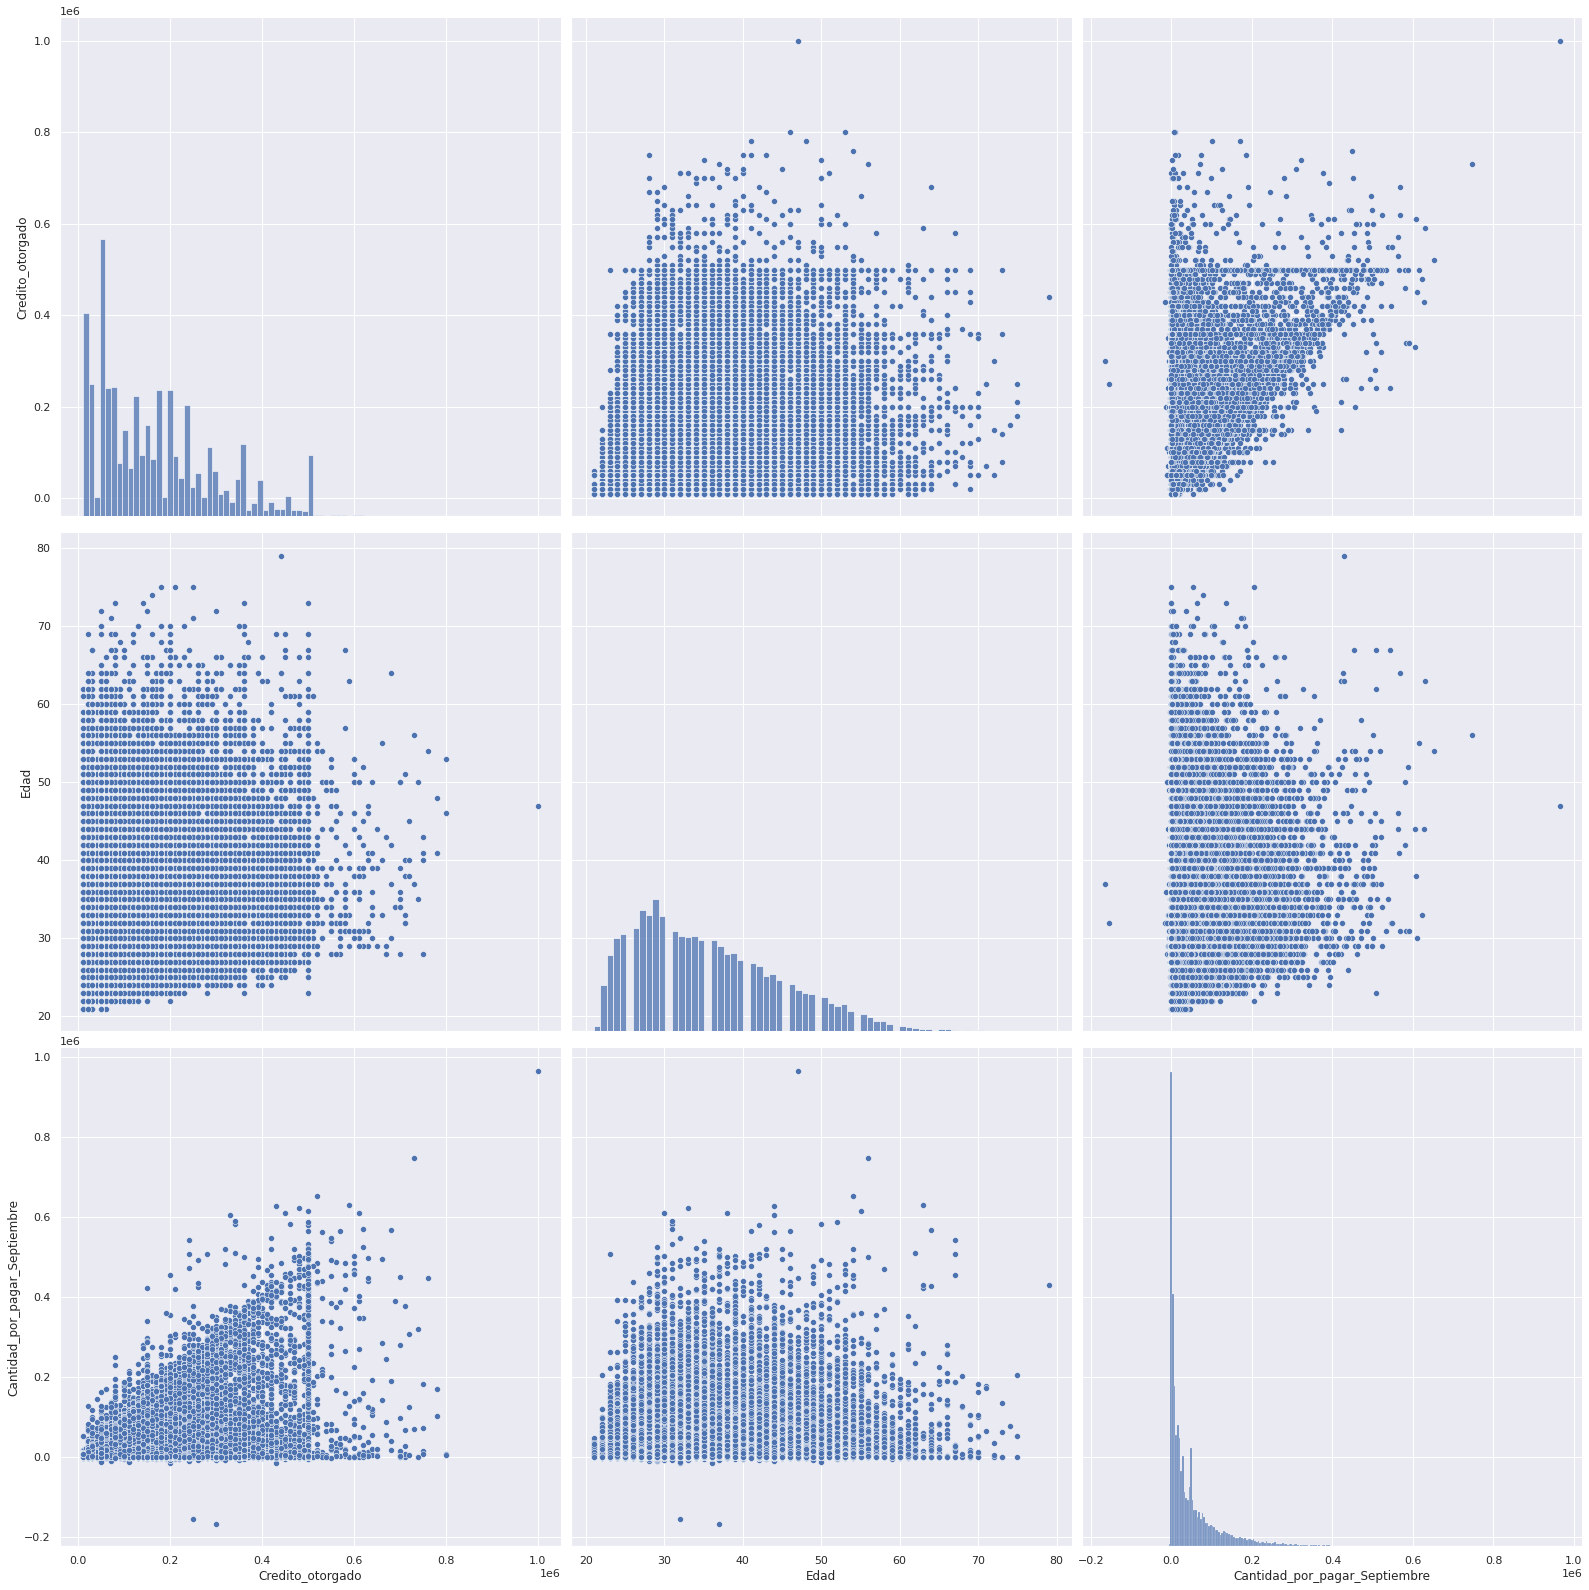

In [ ]:
sns.pairplot(
    df,
    x_vars=["Credito_otorgado", "Edad", "Cantidad_por_pagar_Septiembre"],
    y_vars=["Credito_otorgado", "Edad", "Cantidad_por_pagar_Septiembre"],
     height=7.5
)

Estos histogramas y scatter plots nos ayudan a comprobar una hipótesis inicial 0, el cuál consiste en comprobar si la edad tiene alguna relación con el crédito que te otorgan y a la capacidad de pagar el crédito, después de analizar los gráficos esta hipótesis es rechazada

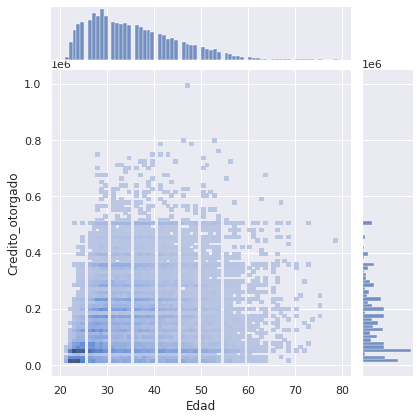

In [ ]:
sns.jointplot(data=df, x="Edad", y="Credito_otorgado", kind="hist")

Esta visualización nos permite combinar los gráficos anteriores en una sóla vista, haciendo de esta visualización la más práctica para análisis de datos en los casos que se quiera ver distribución y correlación en un mismo lugar
